In [28]:
import numpy as np
import pandas as pd
from pathlib import Path
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
import tensorflow as tf
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import balanced_accuracy_score
from sklearn import tree
from numpy import mean
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import RandomOverSampler
from imblearn.ensemble import BalancedRandomForestClassifier, RUSBoostClassifier, BalancedBaggingClassifier

In [29]:
df = pd.read_csv('Resources/model_clean_data.csv')
df

,gender,age,hypertension,heart_disease,ever_married,work_type,residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,26.0,0,0,0,2,0,78.05,30.8,1,0
1,1,71.0,1,0,1,2,1,108.70,31.2,2,0
2,0,46.0,0,0,1,2,1,201.42,50.8,2,0
3,0,52.0,0,0,1,2,0,124.27,22.2,2,0
4,1,67.0,0,0,1,2,0,95.48,30.1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
29060,0,51.0,0,0,1,0,1,226.04,27.1,1,0
29061,0,60.0,0,0,1,2,0,71.98,33.4,1,0
29062,0,45.0,0,0,0,0,0,77.45,42.2,0,0
29063,1,21.0,0,0,1,2,0,88.31,46.6,1,0


In [30]:
#Divide the target column and the features column
y = df['stroke']
X = df.drop(['stroke'], axis = 1)

In [31]:
# Split the data in training and testing using sklearn
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.85, random_state=12)

In [32]:
#Scale the data using StandardScaler
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [33]:
#Define test_model function that will test multiple models.

def test_model(model, data):
    X_train_scaled, X_test_scaled, y_train, y_test = data
    reg = model.fit(X_train_scaled, y_train)
    
    print(f'Model: {type(reg).__name__}')
    print(f'Train score: {reg.score(X_train_scaled, y_train)}')
    print(f'Test Score: {reg.score(X_test_scaled, y_test)}\n')
    y_pred = reg.predict(X_test_scaled)
    y_true = y_test
    print(confusion_matrix(y_true, y_pred))
    print(classification_report(y_test, y_pred))
    print(balanced_accuracy_score(y_test, y_pred))
       

In [ ]:
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
data = X_train_scaled, X_test_scaled, y_train, y_test
test_model(LogisticRegression(), data)
test_model(GaussianNB(), data)
test_model(KNeighborsClassifier(), data)
test_model(AdaBoostClassifier(), data)
test_model(SVC(), data)
test_model(RandomForestClassifier(), data)
test_model(ExtraTreesClassifier(), data)

In [286]:
oversample = RandomOverSampler(sampling_strategy=0.5)
X_over, y_over = oversample.fit_resample(X_train_scaled, y_train)

In [287]:
data = X_over, X_test_scaled, y_over, y_test
test_model(LogisticRegression(), data)
test_model(GaussianNB(), data)
test_model(KNeighborsClassifier(), data)
test_model(AdaBoostClassifier(), data)
test_model(SVC(), data)
test_model(RandomForestClassifier(), data)
test_model(ExtraTreesClassifier(), data)

Model: LogisticRegression
Train score: 0.7724261168384879
Test Score: 0.8458715596330275

[[3633  634]
 [  38   55]]
              precision    recall  f1-score   support

           0       0.99      0.85      0.92      4267
           1       0.08      0.59      0.14        93

    accuracy                           0.85      4360
   macro avg       0.53      0.72      0.53      4360
weighted avg       0.97      0.85      0.90      4360

0.7214078537211055
Model: GaussianNB
Train score: 0.7316288659793815
Test Score: 0.8231651376146789

[[3541  726]
 [  45   48]]
              precision    recall  f1-score   support

           0       0.99      0.83      0.90      4267
           1       0.06      0.52      0.11        93

    accuracy                           0.82      4360
   macro avg       0.52      0.67      0.51      4360
weighted avg       0.97      0.82      0.88      4360

0.6729930373383128
Model: KNeighborsClassifier
Train score: 0.9778144329896907
Test Score: 0.93371559

In [284]:
from imblearn.under_sampling import RandomUnderSampler
undersample = RandomUnderSampler(sampling_strategy=0.5)
X_under, y_under = undersample.fit_resample(X_train_scaled, y_train)

In [285]:
data = X_under, X_test_scaled, y_under, y_test
test_model(LogisticRegression(), data)
test_model(GaussianNB(), data)
test_model(KNeighborsClassifier(), data)
test_model(AdaBoostClassifier(), data)
test_model(SVC(), data)
test_model(RandomForestClassifier(), data)
test_model(ExtraTreesClassifier(), data)

Model: LogisticRegression
Train score: 0.7706959706959707
Test Score: 0.8479357798165138

[[3641  626]
 [  37   56]]
              precision    recall  f1-score   support

           0       0.99      0.85      0.92      4267
           1       0.08      0.60      0.14        93

    accuracy                           0.85      4360
   macro avg       0.54      0.73      0.53      4360
weighted avg       0.97      0.85      0.90      4360

0.727721624570661
Model: GaussianNB
Train score: 0.7282051282051282
Test Score: 0.8215596330275229

[[3532  735]
 [  43   50]]
              precision    recall  f1-score   support

           0       0.99      0.83      0.90      4267
           1       0.06      0.54      0.11        93

    accuracy                           0.82      4360
   macro avg       0.53      0.68      0.51      4360
weighted avg       0.97      0.82      0.88      4360

0.6826911204013799
Model: KNeighborsClassifier
Train score: 0.8139194139194139
Test Score: 0.816972477

In [261]:
from imblearn.combine import SMOTEENN
smote_enn = SMOTEENN(random_state=0)
X_resampled, y_resampled = smote_enn.fit_resample(X, y)
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, train_size=.85, random_state=12)

In [262]:
model = LogisticRegression()
model.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [263]:
X_train_scaled, X_test_scaled, y_train, y_test = train_test_split(X, y, train_size=.85, random_state=12)
data = X_train_scaled, X_test_scaled, y_train, y_test
test_model(LogisticRegression(), data)
test_model(GaussianNB(), data)
test_model(KNeighborsClassifier(), data)
test_model(AdaBoostClassifier(), data)
test_model(SVC(), data)
test_model(RandomForestClassifier(), data)
test_model(ExtraTreesClassifier(), data)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0

Model: LogisticRegression
Train score: 0.9815826755717466
Test Score: 0.9786697247706422

[[4267    0]
 [  93    0]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      4267
           1       0.00      0.00      0.00        93

    accuracy                           0.98      4360
   macro avg       0.49      0.50      0.49      4360
weighted avg       0.96      0.98      0.97      4360

0.5
Model: GaussianNB
Train score: 0.9236996559400931
Test Score: 0.9256880733944954

[[4011  256]
 [  68   25]]
              precision    recall  f1-score   support

           0       0.98      0.94      0.96      4267
           1       0.09      0.27      0.13        93

    accuracy                           0.93      4360
   macro avg       0.54      0.60      0.55      4360
weighted avg       0.96      0.93      0.94      4360

0.6044109457174465
Model: KNeighborsClassifier
Train score: 0.9816636308439587
Test Score: 0.978440366972477

[[4266

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Model: SVC
Train score: 0.9815826755717466
Test Score: 0.9786697247706422

[[4267    0]
 [  93    0]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      4267
           1       0.00      0.00      0.00        93

    accuracy                           0.98      4360
   macro avg       0.49      0.50      0.49      4360
weighted avg       0.96      0.98      0.97      4360

0.5


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Model: RandomForestClassifier
Train score: 1.0
Test Score: 0.9786697247706422

[[4267    0]
 [  93    0]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      4267
           1       0.00      0.00      0.00        93

    accuracy                           0.98      4360
   macro avg       0.49      0.50      0.49      4360
weighted avg       0.96      0.98      0.97      4360

0.5


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Model: ExtraTreesClassifier
Train score: 1.0
Test Score: 0.9770642201834863

[[4260    7]
 [  93    0]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      4267
           1       0.00      0.00      0.00        93

    accuracy                           0.98      4360
   macro avg       0.49      0.50      0.49      4360
weighted avg       0.96      0.98      0.97      4360

0.49917975158190764


In [255]:

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.85, random_state=12)   
print(f'Train score: {model.score(X_train, y_train)}')
print(f'Test Score: {model.score(X_test, y_test)}\n')
y_pred = model.predict(X_test)
y_true = y_test
print(confusion_matrix(y_true, y_pred))
print(classification_report(y_test, y_pred))
print(balanced_accuracy_score(y_test, y_pred))
       

Train score: 0.7238210888484112
Test Score: 0.7327981651376146

[[3137 1130]
 [  35   58]]
              precision    recall  f1-score   support

           0       0.99      0.74      0.84      4267
           1       0.05      0.62      0.09        93

    accuracy                           0.73      4360
   macro avg       0.52      0.68      0.47      4360
weighted avg       0.97      0.73      0.83      4360

0.6794164266400559


In [191]:
print(confusion_matrix(y_test, y_pred))
print(classification_report_imbalanced(y_test, y_pred))

[[3762 1934]
 [  73   44]]
                   pre       rec       spe        f1       geo       iba       sup

          0       0.98      0.66      0.38      0.79      0.50      0.26      5696
          1       0.02      0.38      0.66      0.04      0.50      0.24       117

avg / total       0.96      0.65      0.38      0.77      0.50      0.26      5813



In [36]:
clfb = BalancedRandomForestClassifier(max_depth=6, random_state=12)
clfb.fit(X_train, y_train) 

BalancedRandomForestClassifier(max_depth=6, random_state=12)

In [37]:
from imblearn.metrics import classification_report_imbalanced
y_pred = clfb.predict(X_test)
print(f'Train score: {clfb.score(X_train, y_train)}')
print(f'Test Score: {clfb.score(X_test, y_test)}\n')
print(confusion_matrix(y_test, y_pred))
print(classification_report_imbalanced(y_test, y_pred))
balanced_accuracy_score(y_test, y_pred)

Train score: 0.7273021655535317
Test Score: 0.7380733944954129

[[3146 1121]
 [  21   72]]
                   pre       rec       spe        f1       geo       iba       sup

          0       0.99      0.74      0.77      0.85      0.76      0.57      4267
          1       0.06      0.77      0.74      0.11      0.76      0.57        93

avg / total       0.97      0.74      0.77      0.83      0.76      0.57      4360



0.7557398489533328

In [288]:
def test_model2(model, data):
    X_train, X_test, y_train, y_test = data
    reg = model.fit(X_train, y_train)
    
    print(f'Model: {type(reg).__name__}')
    print(f'Train score: {reg.score(X_train, y_train)}')
    print(f'Test Score: {reg.score(X_test, y_test)}\n')
    y_pred = reg.predict(X_test)
    y_true = y_test
    print(confusion_matrix(y_true, y_pred))
    print(classification_report(y_test, y_pred))
    print(balanced_accuracy_score(y_test, y_pred))

In [291]:
data = X_train, X_test, y_train, y_test
test_model2(RUSBoostClassifier(), data)
test_model2(BalancedRandomForestClassifier(max_depth=2, random_state=12), data)
test_model2(BalancedBaggingClassifier(), data)


Model: RUSBoostClassifier
Train score: 0.7045537340619308
Test Score: 0.7077981651376147

[[3014 1253]
 [  21   72]]
              precision    recall  f1-score   support

           0       0.99      0.71      0.83      4267
           1       0.05      0.77      0.10        93

    accuracy                           0.71      4360
   macro avg       0.52      0.74      0.46      4360
weighted avg       0.97      0.71      0.81      4360

0.7402723073550201
Model: BalancedRandomForestClassifier
Train score: 0.6669904877555151
Test Score: 0.675

[[2866 1401]
 [  16   77]]
              precision    recall  f1-score   support

           0       0.99      0.67      0.80      4267
           1       0.05      0.83      0.10        93

    accuracy                           0.68      4360
   macro avg       0.52      0.75      0.45      4360
weighted avg       0.97      0.68      0.79      4360

0.7498116326597468


AttributeError: ignored

In [48]:
from imblearn.over_sampling import SMOTE
smote=SMOTE()
X_smote, y_smote = smote.fit_resample(X_train ,y_train)
X_smote_test, y_smote_test = smote.fit_resample(X_test ,y_test)

In [276]:
from xgboost import XGBClassifier
xgc=XGBClassifier(objective='binary:logistic',n_estimators=10000,max_depth=4, learning_rate=.0001, n_jobs=-1)
xgc.fit(X_smote,y_smote)

XGBClassifier(learning_rate=0.0001, max_depth=4, n_estimators=10000, n_jobs=-1)

In [278]:
y_pred = xgc.predict(X_test)
print(f'Train score: {xgc.score(X_train, y_train)}')
print(f'Test Score: {xgc.score(X_test, y_test)}\n')
print(confusion_matrix(y_test, y_pred))
print(classification_report_imbalanced(y_test, y_pred))
balanced_accuracy_score(y_test, y_pred)

Train score: 0.7481076705120421
Test Score: 0.7520642201834863

[[3220 1047]
 [  34   59]]
                   pre       rec       spe        f1       geo       iba       sup

          0       0.99      0.75      0.63      0.86      0.69      0.48      4267
          1       0.05      0.63      0.75      0.10      0.69      0.47        93

avg / total       0.97      0.75      0.64      0.84      0.69      0.48      4360



0.6945185733977437

In [225]:
from sklearn.ensemble import AdaBoostClassifier
from imblearn.ensemble import EasyEnsembleClassifier

eec = EasyEnsembleClassifier()
eec.fit(X_train_scaled, y_train)
y_pred = eec.predict(X_test)
print(f'Train score: {xgc.score(X_train, y_train)}')
print(f'Test Score: {xgc.score(X_test_scaled, y_test)}\n')
print(confusion_matrix(y_test, y_pred))
print(classification_report_imbalanced(y_test, y_pred))
balanced_accuracy_score(y_test, y_pred)

AttributeError: ignored

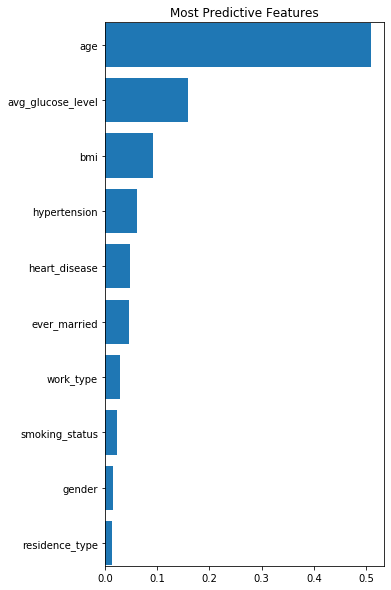

<Figure size 432x288 with 0 Axes>

In [38]:
from matplotlib import pyplot as plt
features = sorted(zip(X.columns, clfb.feature_importances_), key = lambda x: x[1])
cols = [f[0] for f in features]
width = [f[1] for f in features]

fig, ax = plt.subplots()

fig.set_size_inches(5,10)
plt.margins(y=0.001)


ax.barh(y=cols, width=width)
plt.title('Most Predictive Features')
plt.savefig('most_pred_features.png')

plt.show()
plt.savefig('Visualizations/balanced_most_pred.png')

In [207]:
nn_model = tf.keras.models.Sequential()

# First hidden layer
nn_model.add(tf.keras.layers.Dense(units=16, activation="sigmoid", input_dim=10))
# Second hidden layer
nn_model.add(tf.keras.layers.Dense(units=8, activation="sigmoid"))

# Output layer
nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 16)                176       
                                                                 
 dense_7 (Dense)             (None, 8)                 136       
                                                                 
 dense_8 (Dense)             (None, 1)                 9         
                                                                 
Total params: 321
Trainable params: 321
Non-trainable params: 0
_________________________________________________________________


In [209]:
nn_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
fit_model = nn_model.fit(X_under, y_under, epochs=20)

Epoch 1/20
41/41 [==============================] - 1s 2ms/step - loss: 0.6367 - accuracy: 0.6667
Epoch 2/20
41/41 [==============================] - 0s 2ms/step - loss: 0.6257 - accuracy: 0.6667
Epoch 3/20
41/41 [==============================] - 0s 2ms/step - loss: 0.6170 - accuracy: 0.6667
Epoch 4/20
41/41 [==============================] - 0s 2ms/step - loss: 0.6062 - accuracy: 0.6667
Epoch 5/20
41/41 [==============================] - 0s 2ms/step - loss: 0.5940 - accuracy: 0.6667
Epoch 6/20
41/41 [==============================] - 0s 2ms/step - loss: 0.5805 - accuracy: 0.6667
Epoch 7/20
41/41 [==============================] - 0s 2ms/step - loss: 0.5659 - accuracy: 0.6682
Epoch 8/20
41/41 [==============================] - 0s 2ms/step - loss: 0.5511 - accuracy: 0.6883
Epoch 9/20
41/41 [==============================] - 0s 2ms/step - loss: 0.5373 - accuracy: 0.7162
Epoch 10/20
41/41 [==============================] - 0s 2ms/step - loss: 0.5247 - accuracy: 0.7293
Epoch 11/20
41/41 [

In [210]:
nn_model.evaluate(X_test_scaled,y_test,verbose=2)

182/182 - 0s - loss: 0.3319 - accuracy: 0.8366 - 336ms/epoch - 2ms/step


[0.33186104893684387, 0.8365731835365295]

In [218]:
loss, acc = nn_model.evaluate(X_test_scaled, y_test, verbose=0)
print('Test Accuracy: %.3f' % acc)

Test Accuracy: 0.837


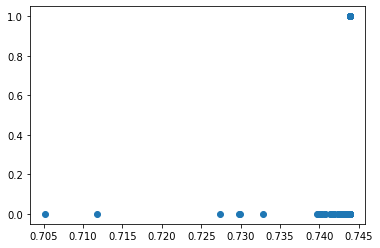

In [219]:
plt.scatter(nn_model.predict(X_test), y_test)

In [216]:
y_pred = nn_model.predict(X_test_scaled)
print(f'Train score: {xgc.score(X_train_scaled, y_train)}')
print(f'Test Score: {xgc.score(X_test_scaled, y_test)}\n')
# print(confusion_matrix(y_test, y_pred))
#print(classification_report_imbalanced(y_test, y_pred))
balanced_accuracy_score(y_test, y_pred)

Train score: 0.8256063994495098
Test Score: 0.8274557027352486



ValueError: ignored

In [220]:
df

,gender,age,hypertension,heart_disease,ever_married,work_type,residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,26.0,0,0,0,2,0,78.05,30.8,1,0
1,1,71.0,1,0,1,2,1,108.70,31.2,2,0
2,0,46.0,0,0,1,2,1,201.42,50.8,2,0
3,0,52.0,0,0,1,2,0,124.27,22.2,2,0
4,1,67.0,0,0,1,2,0,95.48,30.1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
29060,0,51.0,0,0,1,0,1,226.04,27.1,1,0
29061,0,60.0,0,0,1,2,0,71.98,33.4,1,0
29062,0,45.0,0,0,0,0,0,77.45,42.2,0,0
29063,1,21.0,0,0,1,2,0,88.31,46.6,1,0


In [227]:
row = [1, 13, 1, 1, 1, 2, 1, 213, 23, 1]
yhat = nn_model.predict([row])
print('Predicted: %.3f' % yhat)

Predicted: 0.744
